# ObsID : 0945020136, SRCNUM : 4, Instru : EMOS1
**Simbad :** Galaxy (2dFGRS TGS322Z047) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%404738151&Name=2dFGRS%20TGS322Z047&submit=submit

## ESASky

https://sky.esa.int/esasky/?target=52.97008333333333%20-28.304833333333328&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033152.7-281818
- IAU name : 4XMM J033152.7-281818
- RA : 03h 31m 52.751s
- DEC : -28° 18' 18.16"

``GAIA``

- Designation : Gaia DR3 5057378691743871360
- RA : 03h 31m 52.742s
- DEC : -28° 18' 18.52"
- Parallax : -0.7065 mas
- Magnitude G (mag) : 19.6328

``GLADE``

- No : 2 124 866
- RA : 03h 31m 52.754s
- DEC : -28° 18' 18.08"
- Distance : 289.8972 Mpc

``2MASS``

- Name : 03315275-2818185
- RA : 03h 31m 52.751s
- DEC : -28° 18' 18.57"

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


### Redshift

In [2]:
def redshift(d_Mpc):
    H0 = 70 # Hubble constant (km/s/Mpc)
    c = 299792.458 # km/s
    return H0*d_Mpc/c

z = redshift(289.8972)
print("Redshift : z =", z)

Redshift : z = 0.06768950805293442


## Load files

In [3]:
Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945020136_SRCNUM4_EMOS1_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.826e-03 +/- 1.295e-03 (64.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-3
  Telescope: XMM Instrument: EMOS1  Channel Type: PI
  Exposure Time: 7689 sec
 Using fit statistic: chi
 Using Background File                ObsID0945020136_SRCNUM4_EMOS1_background_spectrum.fits
  Background Exposure Time: 7686 sec
 Using Response (RMF) File            ObsID0945020136_SRCNUM4_EMOS1.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020136_SRCNUM4_EMOS1.arf



In [4]:
n_cts = 6.826e-03*7689

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 52.485113999999996

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

(-0.5, 859.5, 665.5, -0.5)

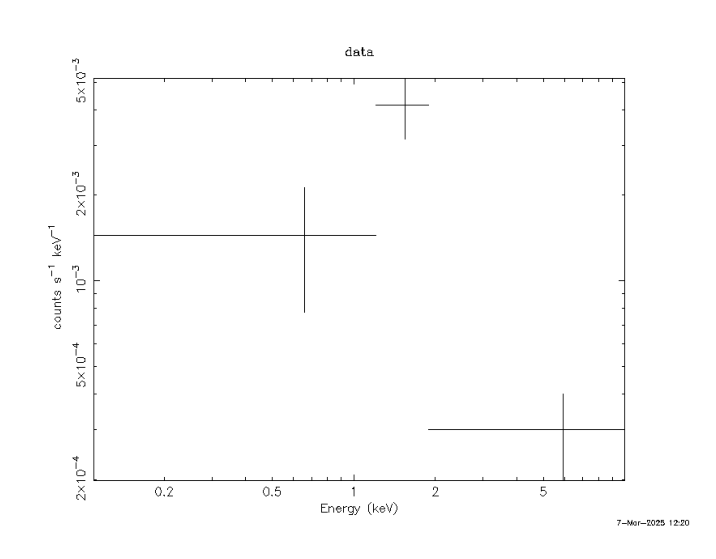

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
**tbabs :**

In [6]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.041547e+11     using 3 bins.

Tes

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 852.5, 660.5, -0.5)

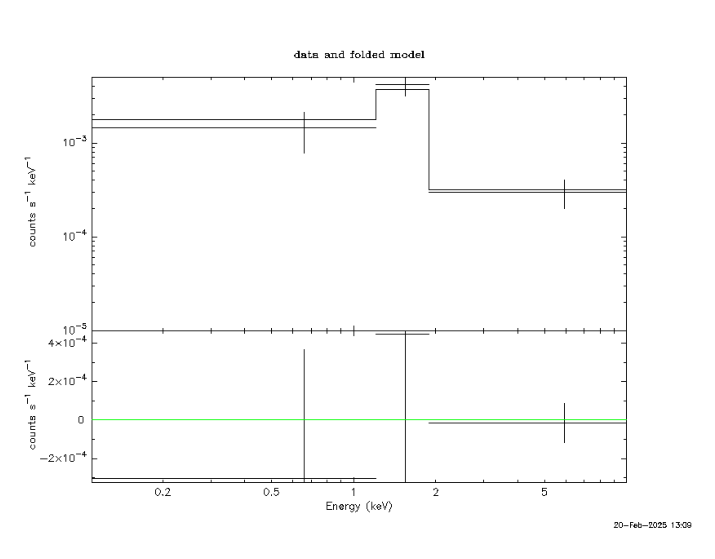

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [7]:
AllModels.clear()
moz = Model("ztbabs*bbody")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp


GammQ: A <=  0
GammQ: A <=  0
GammQ: A <=  0


   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bbody      kT         keV      3.00000      +/-  0.0          
   4    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.041154e+11     using 3 bins.

Test statistic : Chi-Squared              1.041154e+11     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.075664e+11     using 3 bins.

Test statistic : Chi-Squared              1.075664e+11     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          3:kT        4:norm
18.4384      0.303309      0      0.475227       3.15078 

(-0.5, 855.5, 657.5, -0.5)

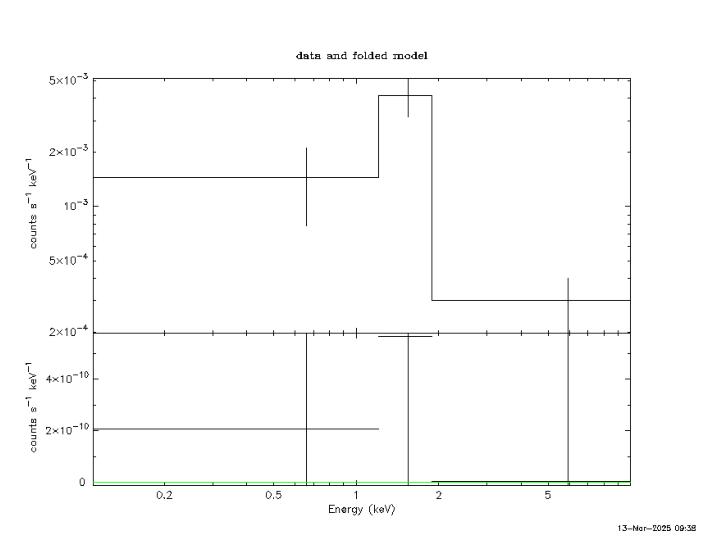

In [8]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbody_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model
**tbabs :**

In [10]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.847113e+09     using 3 bins.

Test statistic : Chi-Squared              3.847113e+09     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
3.70346      1.41812      -2      0.229264       4.32572   4.22488e-05
2.15188      50251.9      -2      0.486167       1.99468   8.60366e-05
0.00164251   23078.7      -3      0.508952       1.99874   0.000118861
1.69546e-07  492.662      -

GammQ: A <=  0
GammQ: A <=  0


  Covariance Matrix
        1           2           3   
   1.485e-01  -5.056e-01   3.915e-05
  -5.056e-01   2.753e+00  -1.774e-04
   3.915e-05  -1.774e-04   1.268e-08
------------------------------------

Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    0.506263     +/-  0.385315     
   2    2   bremss     kT         keV      1.98349      +/-  1.65915      
   3    2   bremss     norm                1.19885E-04  +/-  1.12610E-04  
________________________________________________________________________


Fit statistic  : Chi-Squared                   4e-15     using 3 bins.

Test statistic : Chi-Squared                   4e-15     using 3 bins.
 Cannot calculate null hypothesis probability.


(-0.5, 857.5, 662.5, -0.5)

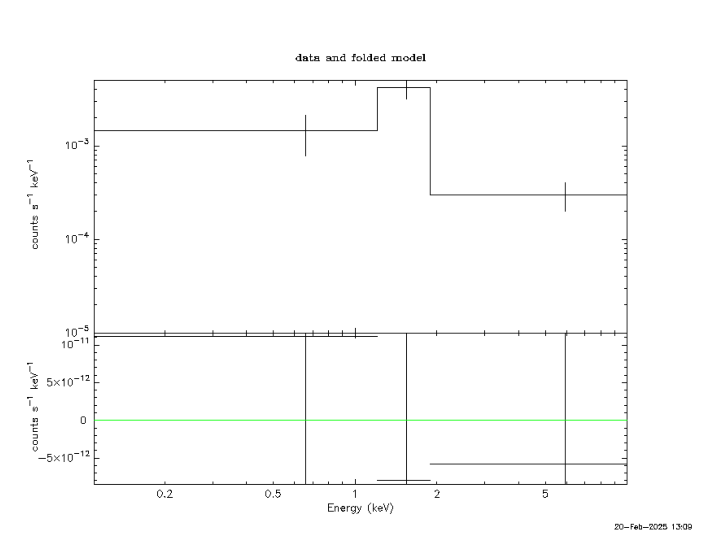

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [11]:
AllModels.clear()
moz = Model("ztbabs*bremss")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bremss     kT         keV      7.00000      +/-  0.0          
   4    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.835141e+09     using 3 bins.

Test statistic : Chi-Squared              3.835141e+09     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              4.300662e+09     using 3 bins.

Test statistic : Chi-Squared              4.300662e+09     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |b

GammQ: A <=  0
GammQ: A <=  0
GammQ: A <=  0


000117142
 Variances and Principal Axes
                 1        3        4  
 4.4439E-10| -0.0001   0.0000   1.0000  
 7.2412E-02|  0.9779   0.2088   0.0001  
 3.0473E+00| -0.2088   0.9779  -0.0001  
----------------------------------------

  Covariance Matrix
        1           2           3   
   2.022e-01  -6.076e-01   4.429e-05
  -6.076e-01   2.918e+00  -1.770e-04
   4.429e-05  -1.770e-04   1.191e-08
------------------------------------

Model zTBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    0.570757     +/-  0.449621     
   2    1   zTBabs     Redshift            6.76895E-02  frozen
   3    2   bremss     kT         keV      2.01038      +/-  1.70809      
   4    2   bremss     norm                1.17142E-04  +/-  1.09125E-04  
________________________________________________________________________


Fit statistic  : Chi-Squared                   7e-09     using 3 bins.

Tes

(-0.5, 856.5, 657.5, -0.5)

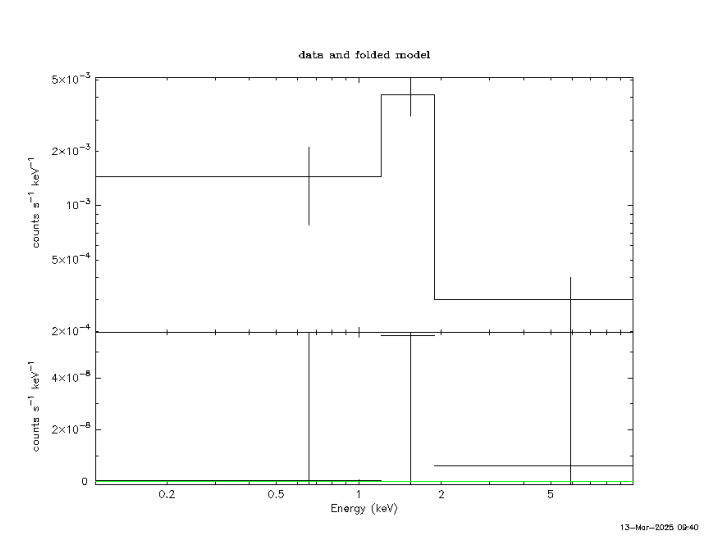

In [12]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremss_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Apec model
**tbabs :**

In [13]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = moz.zTBabs.nH.values[0]


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              4.685624e+08     using 3 bins.

Test statistic : Chi-Squared              4.685624e+08     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
1.29462      2.86751      -1       1.05169       1.45021   0.000233941
0.00357067   70

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 856.5, 660.5, -0.5)

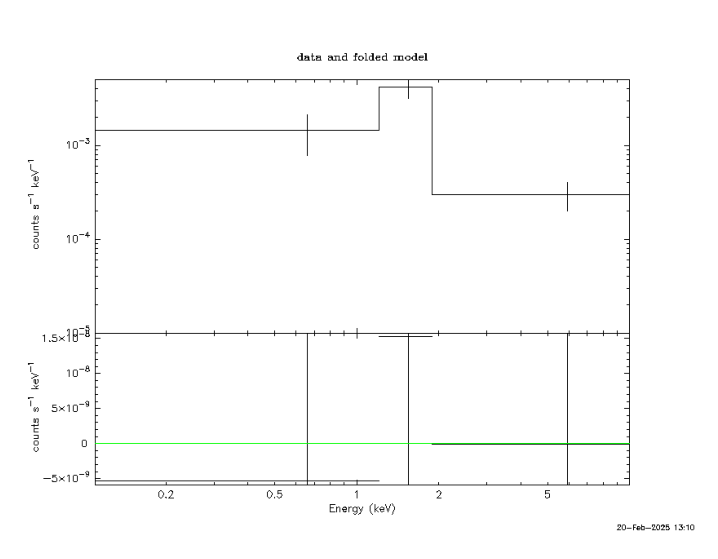

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [14]:
AllModels.clear()
moz = Model("ztbabs*apec")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   apec       kT         keV      1.00000      +/-  0.0          
   4    2   apec       Abundanc            1.00000      frozen
   5    2   apec       Redshift            0.0          frozen
   6    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.561034e+08     using 3 bins.

Test statistic : Chi-Squared              4.561034e+08     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              7.288502e+08     using 3 bins.

Test statistic : Chi-Squared              7.288502e+08     using 3 bins.


GammQ: A <=  0
GammQ: A <=  0


 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          3:kT        6:norm
5.23853      3.3834       -2      0.893098       1.87857   0.000142810
5.21184      17222.4      -3       1.60491      0.802315   0.000303277
5.01213      7456.51      -2       1.61596       1.41425   0.000232039
1.86864      10246.3      -3      0.961005       1.50942   0.000284440
0.0414913    8862.83      -4       1.20118       1.46767   0.000293664
0.000290031  744.947      -5       1.31314       1.41198   0.000309963
3.08648e-09  22.5007      -6       1.31912       1.41221   0.000311588
1.7535e-17   0.242665     -7       1.31916       1.41218   0.000311598
 Variances and Principal Axes
                 1        3        6  
 3.1726E-09| -0.0002  -0.0001   1.0000  
 6.0544E-02| -0.6395  -0.7688  -0.0002  
 2.0146E+00|  0.7688  -0.6395   0.0001  
---------------------------------------

GammQ: A <=  0


(-0.5, 856.5, 660.5, -0.5)

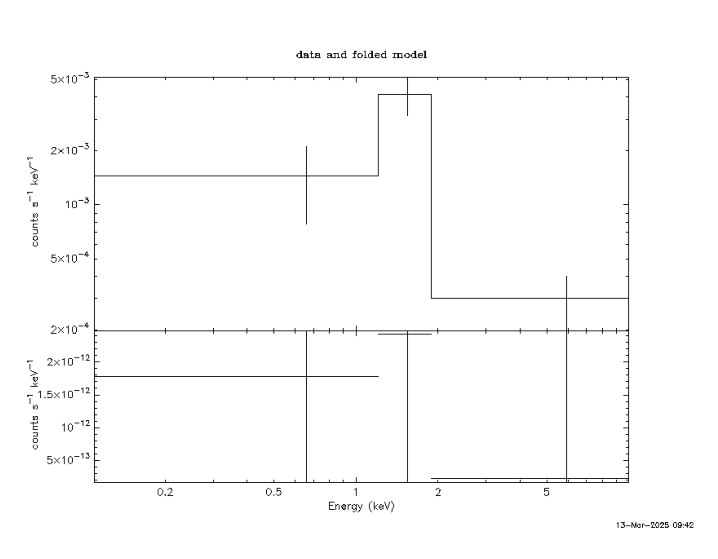

In [15]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec_z.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
**tbabs :**

In [16]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.632655e+10     using 3 bins.

Test statistic : Chi-Squared              2.632655e+10     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
9.1377       1.60811      -2      0.142489       1.26868   1.55337e-05
2.45545      150279       -1      0.138800       1.46604   3.07299e-05
2.14914      28677.5      -2      0.459685       2.29121   6.33343e-05
0.934927     29823.9     

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 859.5, 664.5, -0.5)

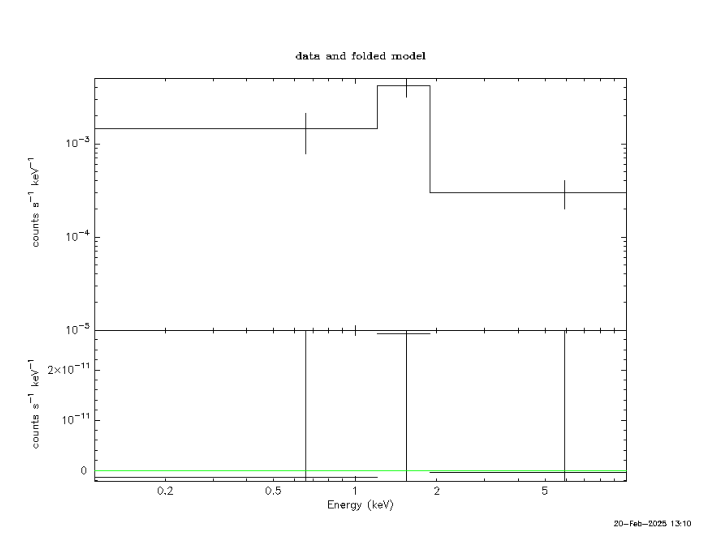

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [17]:
AllModels.clear()
moz = Model("ztbabs*powerlaw")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   4    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.628779e+10     using 3 bins.

Test statistic : Chi-Squared              2.628779e+10     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              2.818119e+10     using 3 bins.

Test statistic : Chi-Squared              2.818119e+10     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  

GammQ: A <=  0
GammQ: A <=  0
GammQ: A <=  0


Model zTBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    0.783382     +/-  0.609641     
   2    1   zTBabs     Redshift            6.76895E-02  frozen
   3    2   powerlaw   PhoIndex            2.70860      +/-  1.09374      
   4    2   powerlaw   norm                1.32998E-04  +/-  1.44114E-04  
________________________________________________________________________


Fit statistic  : Chi-Squared                   4e-18     using 3 bins.

Test statistic : Chi-Squared                   4e-18     using 3 bins.
 Cannot calculate null hypothesis probability.


(-0.5, 856.5, 661.5, -0.5)

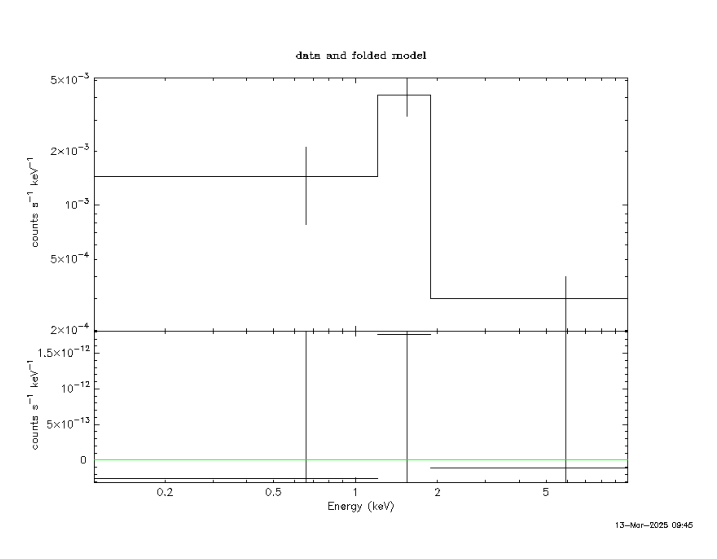

In [18]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw_z.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 52.9697976°
- Dec = -28.3050451°

53.97 -28.31

**Column density :** nH = 3*10^20 cm^-2

In [19]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print(f"(ztbabs) : {nH_bbody_z*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print(f"(ztbabs) : {nH_bremss_z*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print(f"(ztbabs) : {nH_apec_z*10**22}")

The different models give a column density of :

bbody
(tbabs) : 46711.32901335448
(ztbabs) : 1.9309822373952115e+21

bremss
(tbabs) : 5.0626322194986e+21
(ztbabs) : 5.707565870732718e+21

apec
(tbabs) : 1.11239145673521e+22
(ztbabs) : 1.3191627507442085e+22


## Flux
### X-ray flux

In [20]:
AllModels.calcFlux(".2 12.0")

 Model Flux 4.9404e-05 photons (1.8358e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [21]:
Flux = 1.8358e-13 # ergs/cm^2/s
print(color.BOLD+"X-ray  flux : "+color.END+f"F_X = {Flux} ergs/cm^2/s")

X-ray  flux : F_X = 1.8358e-13 ergs/cm^2/s


### Optical flux

In [23]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 19.6328

F = F_optical(G)

print(color.BOLD+"Optical  flux : "+color.END+f"F_opt = {F} ergs/cm^2/s")

Optical  flux : F_opt = 1.4725474536744745e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [24]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical = {Flux/F}")
print(f"F_x-ray = {Flux/F}*F_optical")

X-ray flux / Optical flux ratio : F_x-ray/F_optical = 1.2466830834001954
F_x-ray = 1.2466830834001954*F_optical


## Luminosity

In [25]:
"""GAIA"""

P_mas = 0.7065 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")
print()

"""GLADE"""

d_kpc = 289897.2 # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GLADE)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

(GAIA)
Distance : 4.3675866949752303e+21 cm
Luminosité : 4.400664888311916e+31 erg/s

(GLADE)
Distance : 8.945357900400001e+26 cm
Luminosité : 1.8459956443278067e+42 erg/s
